# Import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
%matplotlib inline

# Read, clean and split data

In [5]:
data = pd.read_csv('GameData_25april.csv')
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
train, test = train_test_split(data, test_size=0.3)
x_train = train.loc[:,0:13]
y_train = train.loc[:,14]
x_test = test.loc[:,0:13]
y_test = test.loc[:,14]

# Classification Algorithms

## Decision Tree

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [12]:
acc

0.9203910614525139

## Graph Vizualization 

In [30]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

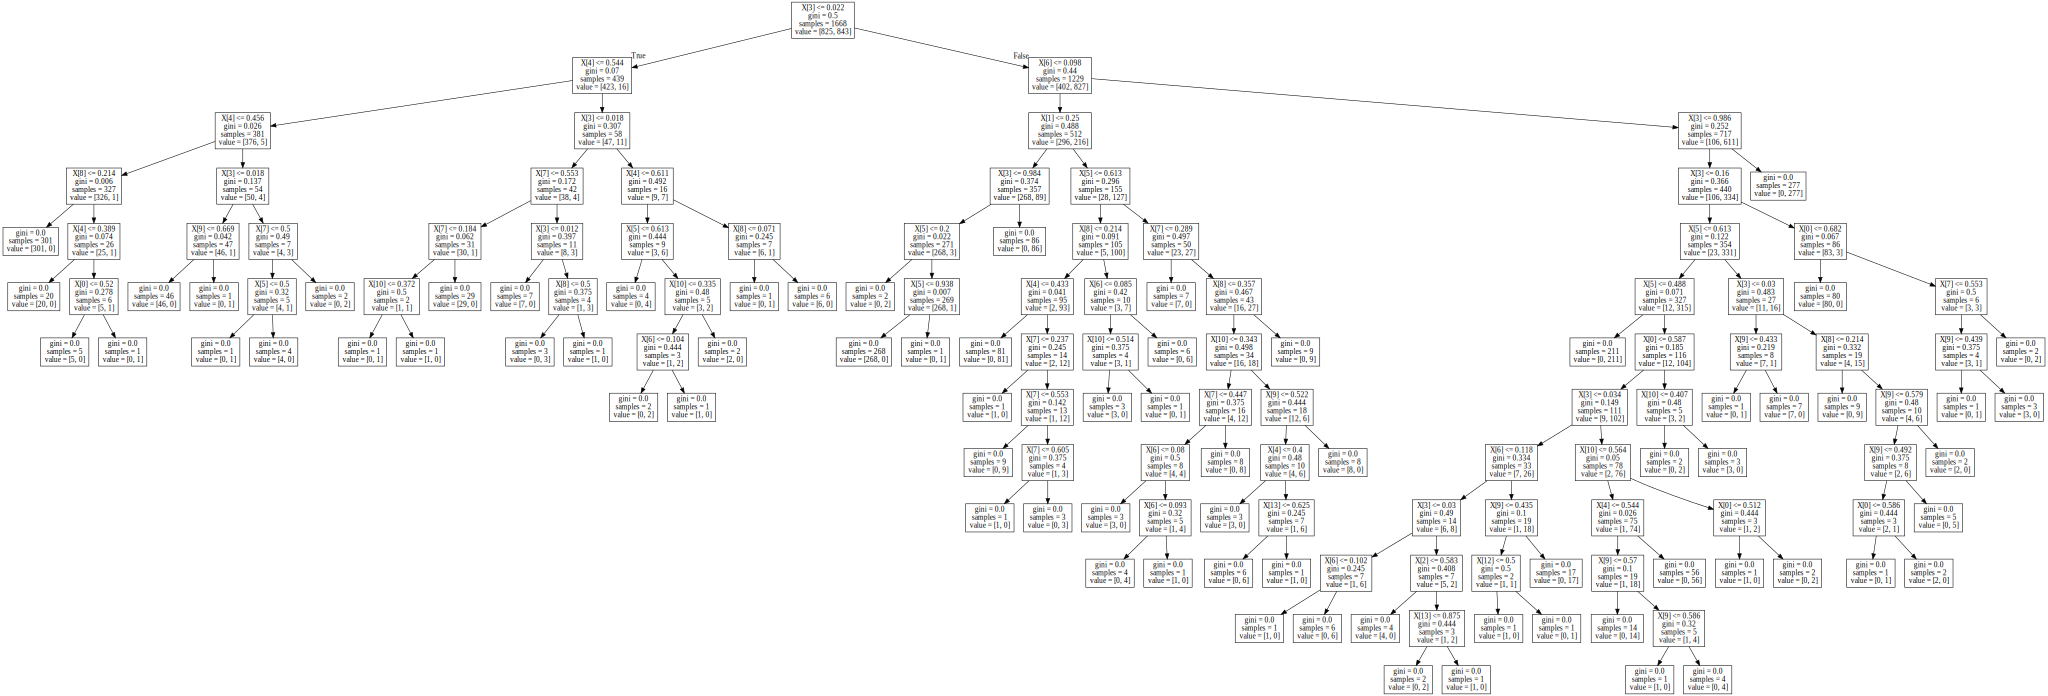

In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph

## Random Forests

In [52]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [53]:
acc

0.93994413407821231

## Support Vector Machine

In [56]:
clf = svm.SVC()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [57]:
acc

0.80726256983240219

## Logistic Regression

In [59]:
clf = LogisticRegression(random_state=123)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)

In [60]:
acc

0.83519553072625696

## Linear Regression

# TSNE

In [15]:
xt = TSNE(n_components=2).fit_transform(data.loc[:,0:13])


In [35]:
labels = data.loc[:,1]

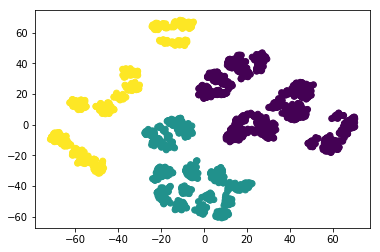

In [44]:
plt.scatter(xt[:,0],xt[:,1],c=labels,label=labels)
plt.show()